# Retail Sales Data Analysis

![Imagem 1](https://storage.googleapis.com/kaggle-datasets-images/3655505/6347913/78fec3d6d2c81294346fa618ba0caf00/dataset-cover.jpg?t=2023-08-22-18-40-05)

Esse  Notebook, contém a analise de dados feito em Vendas de retalho, com objectivo de saber mais sobre as vendas, e sobre os tipos de clientes que mais compram esses produtos.

O Dataset pertence ao tipo de licença de dominio publico `CC0: Public Domain`, que está disponível para Download na plataforma [Keagle - Retail Sales Dataset](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset/data?select=retail_sales_dataset.csv), criado por __*MOHAMMAD TALIB*__. O Dataset contém os seguintes atributos:

- Transaction ID: Um identificador exclusivo para cada transação, permitindo rastreamento e referência.
- Date: A data em que a transação ocorreu, fornecendo insights sobre as tendências de vendas ao longo do tempo.
- Customer ID: um identificador exclusivo para cada cliente, permitindo uma análise centrada no cliente.
- Gender: O gênero do cliente (masculino/feminino), oferecendo insights sobre padrões de compra baseados em gênero.
- Age: A idade do cliente, facilitando a segmentação e exploração de influências relacionadas à idade.
- Product Category: a categoria do produto adquirido (por exemplo, eletrônicos, roupas, beleza), ajudando a entender as preferências do produto.
- Quantity: Quantidade de unidades do produto adquiridas, contribuindo para insights sobre volumes de compras.
- Price per Unit: O preço de uma unidade do produto, auxiliando nos cálculos relativos ao gasto total.
- Total Amount: O valor monetário total da transação, mostrando o impacto financeiro de cada compra.

O Autor deste dataset, dispõem algumas perguntas que podemos fazer ao Conjunto de dados, e que iremos responder, que são:

1. Como a idade e o sexo do cliente influenciam seu comportamento de compra?
2. Existem padrões discerníveis nas vendas em diferentes períodos de tempo?
3. Quais categorias de produtos têm maior apelo entre os clientes?
4. Quais são as relações entre idade, gastos e preferências de produto?
5. Como os clientes adaptam seus hábitos de compra durante as tendências sazonais?
6. Existem comportamentos de compra distintos com base no número de itens adquiridos por transação?
7. Que insights podem ser obtidos a partir da distribuição dos preços dos produtos dentro de cada categoria?

Muitas outras perguntas poderam aparecer no decorrer da Analise do conjunto de dados, tais como:
1. Avalie a frequência de compra dos clientes ao longo do tempo.
2. Analise se existe uma relação entre a idade e a fidelidade do cliente.
3. Identifique oportunidades para programas de fidelidade com base nos padrões de compra.

---
## Carregando os Dados

Nesta etapa vamos carregar os dados que no nosso  projecto, é proveniente de um arquivo CSV (poderia ser em um outro formato), carregar as bibliotecas principais para a nossa analise, e as demais vão ser adicionadas a medida que se fizerem necessarias ao longo do projecto.

In [1]:
# importando os modulos principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
# Carregando o ficheiro do sistema
try:
    itens = os.listdir('dataset')

    for item in itens:
        fullpath = os.path.join('dataset',item) # esse bloco funciona apenas se tiver um ficheiro de dados dentro da pasta, se tiver mais, modifique o código
except FileNotFoundError:
        print(f"A pasta '{caminho_da_pasta}' não foi encontrada.")
except Exception as e:
        print(f"Ocorreu um erro: {e}")

In [3]:
# importando o conjunto de dados
retail_sales = pd.read_csv(fullpath)
# Mostrando os 5 top elementos dos conjunto de dados
retail_sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Explorando os dados

Nesta etapa vamos explorar o conjunto de dados, buscando ver o tipo de dados, se temos valores nulos, ou duplicados, e como estão distribuido alguns tipos de dados.

In [4]:
# Verificando a dimensão do conjunto de dados
print(f"O Dataset tem {retail_sales.shape[0]} linhas e {retail_sales.shape[1]} colunas") 

O Dataset tem 1000 linhas e 9 colunas


Como podemos ver acima, o nosso conjunto de dados, possui 1000 linhas de dados, e 9 atributos, que estão descrito acima neste **notebook**.

In [5]:
# Verificando os nomes das colunas
retail_sales.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [6]:
# Verificando informações basica sobre os dados
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Como podemos notar acima, temos 9 colunas, e cada coluna possui 1000 informações, na qual podemos ver que não temos valores nulos para cada coluna no nosso conjunto de dados. Podemos aferir também que temos 2 tipos de dados principais, Valores inteiros e valores de texto (object), e se prestarmos atenção a data da venda do produto não deveria ser de tipo object, o que quer dizer que devemos fazer a mudança desse tipo de dados.

In [7]:
# convertendo a data para o formato desejado
retail_sales['Date'] = pd.to_datetime(retail_sales['Date'])

retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


Com a data convertido para o formato certo, vamos em primeira instancia verificar se temos valores duplicados

In [8]:
retail_sales.duplicated().any()

False

Acima, temos a confirmação que não temos valores duplicados.

----

### Analise Univariada

Nesta Estapa começaremos analisar as variaveis individualmente, para melhor enriquecer o nosso conhecimento sobre os dados, e que tipo de informação podemos tirar deles.

In [9]:
# vamos fazer a descrição estatistica dos dados de tipo objecto e numerico
retail_sales.describe(include='object')

,Customer ID,Gender,Product Category
count,1000,1000,1000
unique,1000,2,3
top,CUST001,Female,Clothing
freq,1,510,351


Como podemos ver, temos apenas 3 variaveis qualitativas, na qual uma delas é boleana **(Gender)**, que possui apenas dois valores possiveis, (M, F), a moda desta variavel é o sexo femenino, com mais aparição no nosso conjunto de dados, que mais tarde iremos ver isso representados em graficos.

A variavel **Product Category** possui apenas 3 valores para productos, na qual o que mais aparece no nosso dataset é os productod de vestuario, que também iremos melhor representar graficamente.

Essas duas variaveis são otimas variaveis para serem definidas como tipo de dado categorico, isso caso se necessite diminuir o tamanho do conjunto de dados, o que não é o nosso caso, por isso não iremos fazer-lo.

A váriavel **Customer ID** Nos mostra que todos os cliente no nosso conjunto de dados são diferente, mas podemos confirmar isso, vendo se tem valores duplicados.


In [10]:
# O Resumo estatistico para dados numericos!
retail_sales.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


A variavel **Transaction ID** pode ser ignorada aqui, já que não nos dá uma informação util.

Para a variavel **Age (Idade)** podemos aferir que a idade média dos compradores é de 41 anos, com idades compreendidas entre 18 a 64 anos, e que as idades encontram-se bem distribuida no nosso conjunto de dados, o que iremos melhor ver isso usando o histograma, ou grafico de caixa.

Para as variaveis **Price per Unit & Total Amount** é bem notavel que existam valores outliers, mas sendo o valor dos productos vendidos, eles devem ser considerados em nossa analise, sendo que não podemos excluir-los usando tecnicas para remomoção de outliers.

----

#### Analisando as Variaveis Qualitativas

In [11]:
# Vendo se a variavel Customer ID tem valores repetidos, vendo o numero de valores unicos
retail_sales['Customer ID'].nunique()

1000

Isso comprova que todos valores dos clientes são unicos, ou sejá temos informação de venda para 1000 clientes diferentes. 

In [12]:
# vamos ver a distribuição de clientes por sexo
retail_sales['Gender'].value_counts()

Female    510
Male      490
Name: Gender, dtype: int64

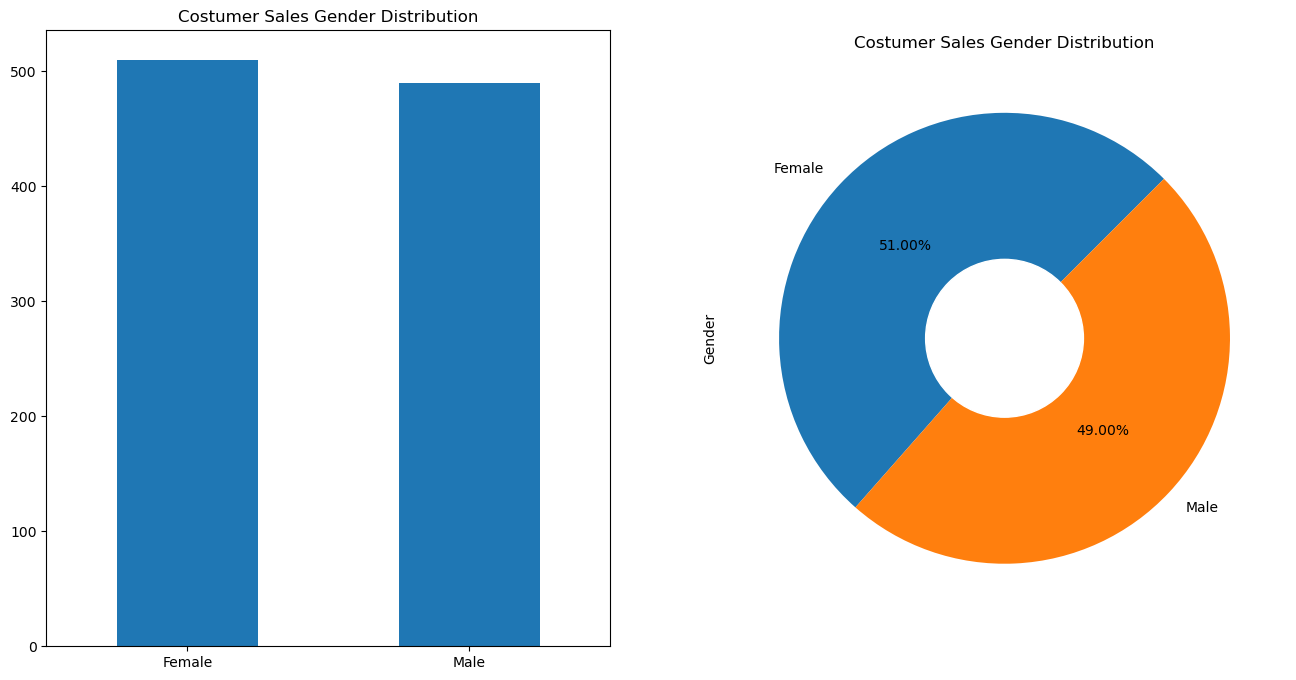

In [13]:
# vamos pilotar um grafico para melhor entendimento
fig, axes = plt.subplots(1,2,figsize=(16,8))
retail_sales['Gender'].value_counts().plot(title='Costumer Sales Gender Distribution', ax=axes[0], kind='bar')
axes[0].set_xticklabels(['Female','Male' ],rotation=0)


retail_sales['Gender'].value_counts().plot(title='Costumer Sales Gender Distribution', ax=axes[1], kind='pie',autopct='%.2f%%', startangle=45)

centro = plt.Circle((0,0), 0.35, color='white')
axes[1].add_artist(centro)

plt.show()

# Obs: Melhorar esse grafico

Podemos notar no grafico de barras que a percentagem de mulheres que compram productos é muito superior ao homens, como já previsto acima, o que diz que a maior parte dos clientes são do sexo femenino, representando 51% dos dados colectados.

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64


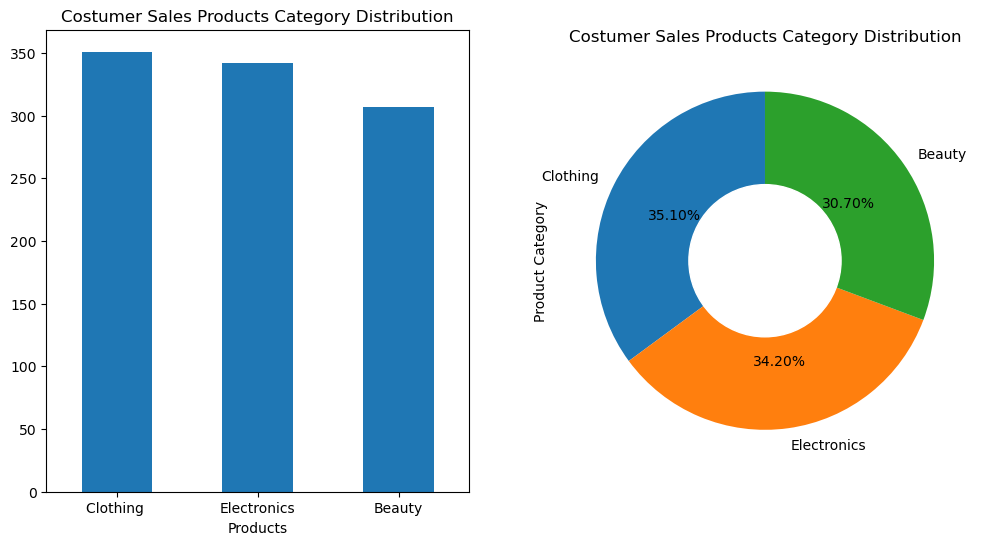

In [14]:
# vamos fazer o mesmo para a categoria de Productos
print(retail_sales['Product Category'].value_counts())

fig, axes = plt.subplots(1,2,figsize=(12,6))
retail_sales['Product Category'].value_counts().plot(title='Costumer Sales Products Category Distribution', ax=axes[0], kind='bar')
axes[0].set_xticklabels(['Clothing ','Electronics','Beauty' ],rotation=0)
axes[0].set_xlabel('Products')

retail_sales['Product Category'].value_counts().plot(
    title='Costumer Sales Products Category Distribution', ax=axes[1], kind='pie', autopct='%.2f%%', startangle=90
    )

centro = plt.Circle((0,0), 0.45, color='white')
axes[1].add_artist(centro)

plt.show()

Os productos podem ser classificados em 3 categorias:
- Clothing  35,1%
- Electronics  34,2%
- Beauty    30,7%

O que explica o facto de a maioria dos clientes serem mulheres, sendo que os productos mais colectados são mais visados por mulheres, mas podemos provar isso mais adiante enquanto analisamos os nossos dados, vendo, qual sexo compra mais certo tipo de producto.

----
#### Analisando Váriaveis Numericas

Agora vamos começar analisando a distribuição dos dados numericos, para melhor entendermos esses mesmo dados.

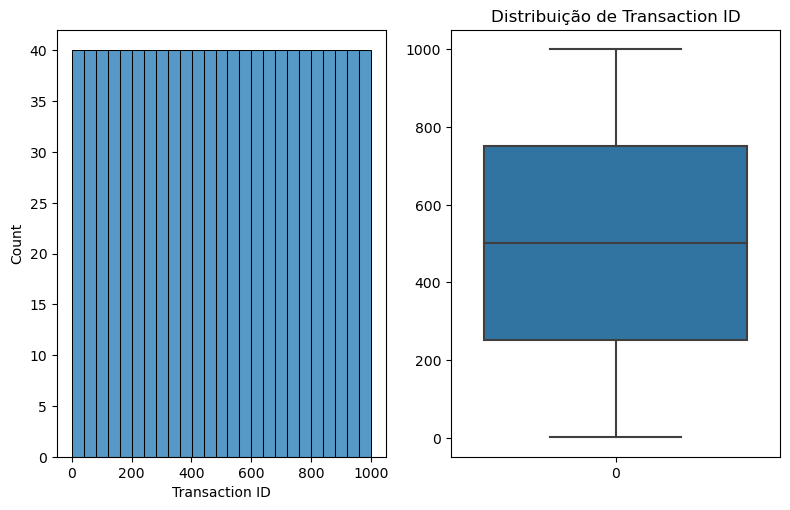

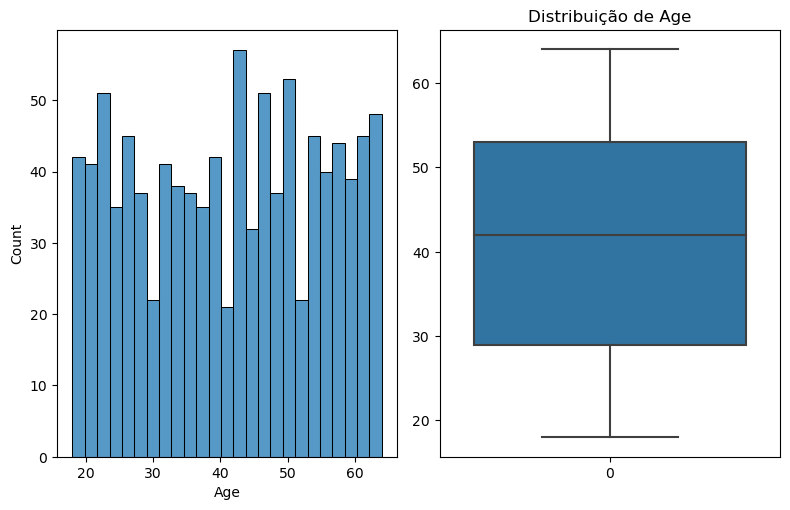

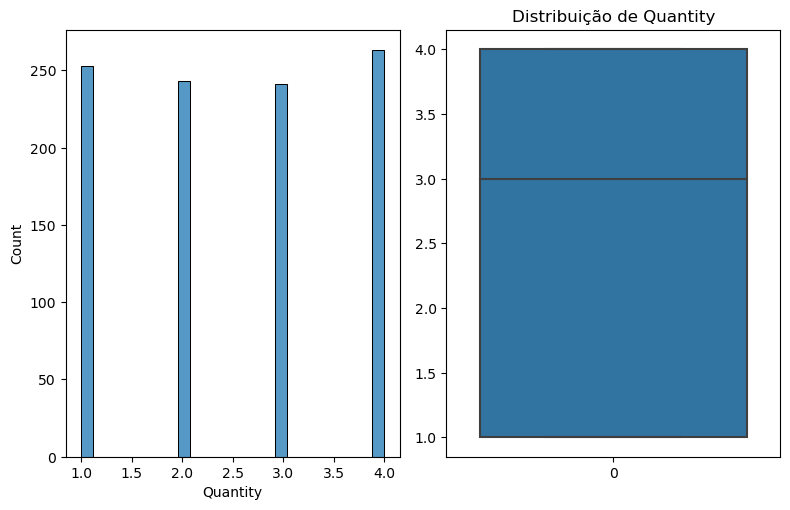

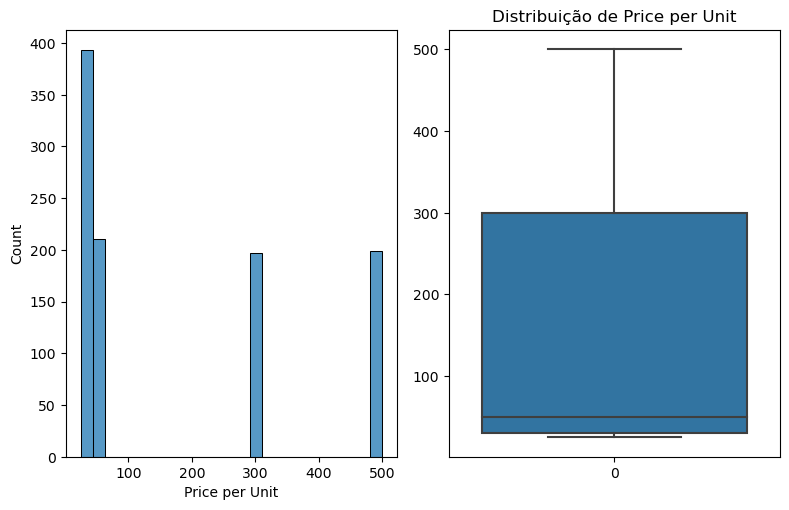

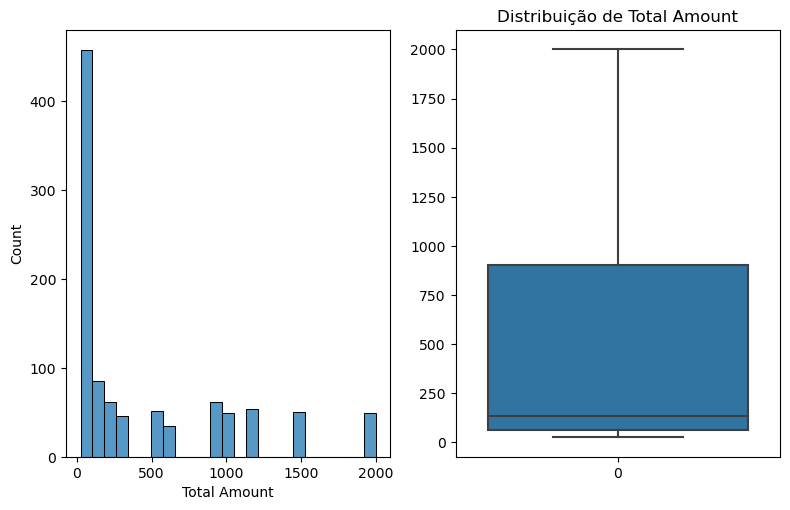

In [15]:
# Vamos criar plot para ver a distribuição dos dados, usando um histograma e um boxplot, para todos os dados numericos.


# Vamos criar um ciclo de repetição para pegar as colunas de dados numerica! para plotar;
for col in retail_sales.select_dtypes(include='int64').columns.to_list():
    fig, axes = plt.subplots(1,2,figsize=(8,5))
    # Criando um histograma no eixo 0
    sns.histplot(retail_sales[col], bins=25, ax=axes[0])
    # Criando um boxplot no eixo 1
    sns.boxplot(retail_sales[col], ax=axes[1])
    # Criando um titulo geral e exibindo o grafico
    plt.tight_layout()
    plt.title(f'Distribuição de {col}')
    plt.show()
    


Podemos ignorar o Grafico sobre Transiction ID, sendo que essa informação não nos diz nada relevante.

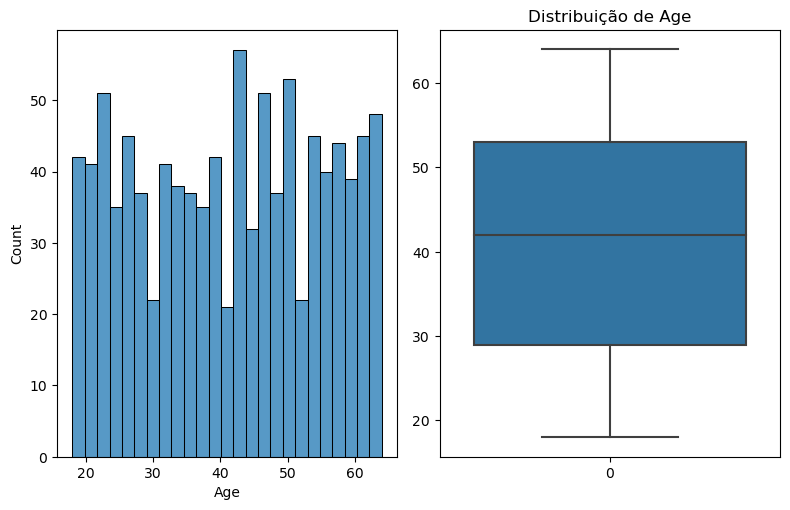
Para a Distribuição das idades, podemos ver que a idade dos clientes está em um intervalos de [18 a 64] anos, sendo a idade média dos usuarios de 42 anos, como é dá para observar no grafico de boxplot. Podemos notar também que a distribuição de idade não obedece a uma distribuição normal.

O boxplot é muito auto-explicativo, 75% dos clientes tem idade ate 53 anos.

Para os demias graficos não é muito interessante explicarmos a sua distribuição, já que a quantidade são valores pequenos, e o mesmo para o preço unitario de cada produto, não existe muita distribuição desses dados.

In [16]:
retail_sales['Price per Unit'].unique()

array([ 50, 500,  30,  25, 300], dtype=int64)

Podemos ver que os preços unitarios dos productos vendidos variam em 5 valores possiveis, como como mostrado acima.

abaixo é exibido um barplot mostrando a distribuição desses productos, no nosso conjunto de dados.

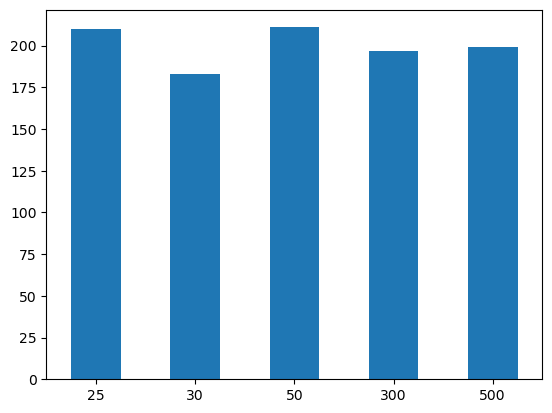

In [17]:
retail_sales['Price per Unit'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

#### Analise Bivariavel.

Agora vamos analisar duas ou mais variaveis conjuntas, assim podendo entender melhor o nosso conjunto de dados.

Vamos começar analisando o total de compra  por genero e productos.

In [18]:
retail_sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [19]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas

prod_by_gender = retail_sales.groupby(['Gender','Product Category']).sum(numeric_only=True).sort_values('Total Amount', ascending=False)

prod_by_gender

Transaction ID   Age  Quantity  Price per Unit  \
Gender Product Category                                                   
Female Clothing                   87854  7511       441           31185   
Male   Electronics                88230  7392       410           31830   
Female Electronics                87681  6882       439           30380   
       Beauty                     78221  6699       418           30270   
Male   Clothing                   85871  7213       453           29990   
       Beauty                     72643  5695       353           26235   

                         Total Amount  
Gender Product Category                
Female Clothing                 81275  
Male   Electronics              80170  
Female Electronics              76735  
       Beauty                   74830  
Male   Clothing                 74305  
       Beauty                   68685

In [20]:
# Convertemos a coluna 'Total Amount' em número inteiro e classificamos por categoria
sales_gender_df = prod_by_gender[['Total Amount']].sort_values(by='Gender').reset_index()

sales_gender_df

,Gender,Product Category,Total Amount
0,Female,Clothing,81275
1,Female,Electronics,76735
2,Female,Beauty,74830
3,Male,Electronics,80170
4,Male,Clothing,74305
5,Male,Beauty,68685


Classificamos os dados por genero, que é essencial para a elaboração do grafico.

In [21]:
# Vamos criar um outro dataframe só para os elementos da categorias, neste caso o genero (sexo)
sales_gender_prod_df = prod_by_gender.groupby(by='Gender').sum(numeric_only=True).reset_index()

sales_gender_prod_df

,Gender,Transaction ID,Age,Quantity,Price per Unit,Total Amount
0,Female,253756,21092,1298,91835,232840
1,Male,246744,20300,1216,88055,223160


In [22]:
# Aqui vamos criar um conjunto de cores para os productos e para o generos.

cores_gender = ['#00b2ff','#e61919']

# cores para productos
cores_prod = ['#5815ea','#fff300','#ff7900']

Uma vez criada a paleta de cores, vamos plotar o nosso grafico para melhor entedermos, como estão as vendas dos productos com base no genero.

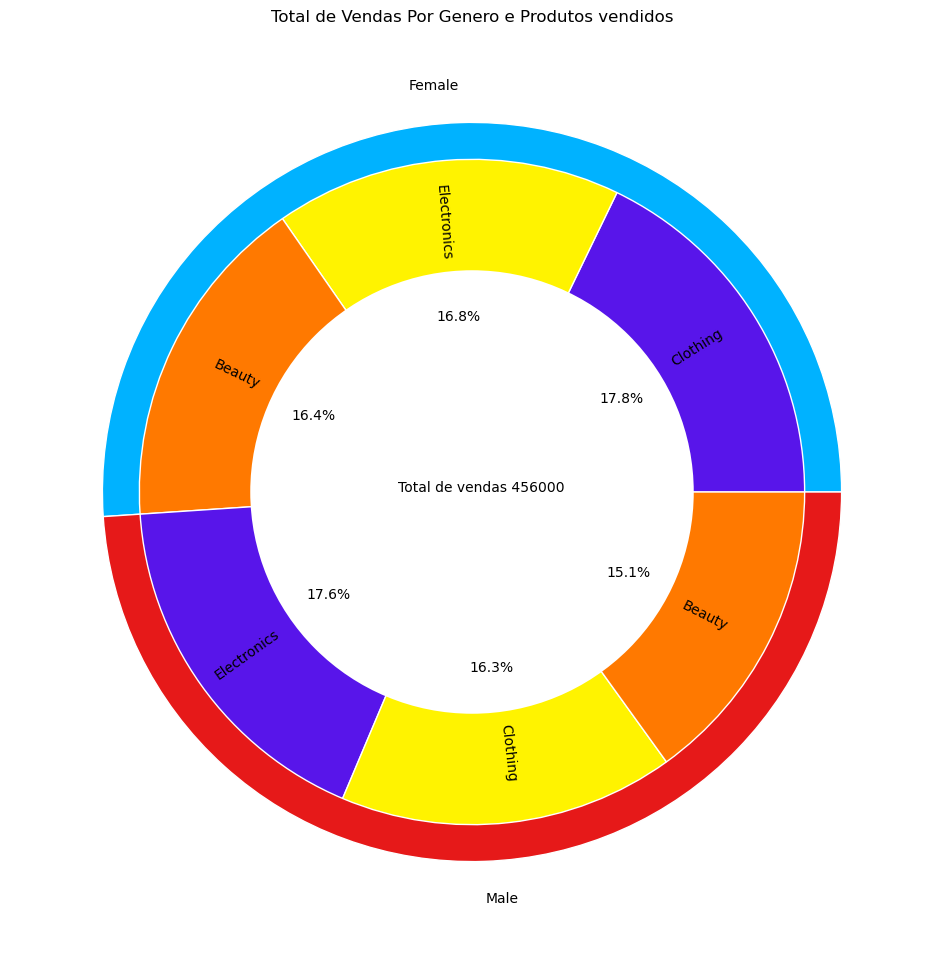

In [23]:
# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Cria o gráfico de rosca externo para 'Gender'
g1 = ax.pie(sales_gender_prod_df['Total Amount'],
            radius=1,
            labels=sales_gender_prod_df['Gender'],
            wedgeprops=dict(edgecolor='white'),
            colors=cores_gender
            )

# Cria o gráfico interno para 'Product Category'
g2 = ax.pie(sales_gender_df['Total Amount'],
            radius=0.9, labeldistance=0.7,
            labels=sales_gender_df['Product Category'],
            colors=cores_prod,
            wedgeprops=dict(edgecolor='white'),
            autopct='%1.1f%%',
            pctdistance=0.53,
            rotatelabels=True
            )

# Cria um buraco no centro do pie
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# labels e Anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.annotate(text=f'Total de vendas {sum(sales_gender_df["Total Amount"])}', xy=(-0.2,0))

plt.title('Total de Vendas Por Genero e Produtos vendidos')

plt.show()

Como podemos ver pelo o grafico, podemos tirar as seguintes insights:

Para o Genero Femenino, temos:
- Vestimentas 17,8%
- Eletronicos 16,8%
- Produuctos de Beleza 16,4%

Isso nos mostra que a meninas têm comprado mais productos de vestimentas, do que productos de beleza, o que em sí já é um bom factor para um marketing direcionado. 

Para o Genero Masculino, temos:
- Eletronicos 17,6%
- Vestimentas 16,3%
- Produuctos de Beleza 15,1%

Para os homens, o producto mais comprados são eletronicos, a seguir de vestimentas, e por ultimo produtos de beleza.

Podemos ainda analisar mais afundo porque o producto de beleza é o menos comprado em ambos os grupos (Especialmente no grupo femenino), será que temos um motivo pela qual a compra desses productos são baixas em relação aos outros tipos de productos? Será que a idade tem alguma coisa haver com a compra desses produtos?

In [24]:
# Agrupa o DataFrame por 'Age' e 'Product Category' e conta o número de transações para cada grupo
age_prod_gouped = retail_sales.groupby(['Age', 'Product Category'])['Transaction ID'].count().unstack()

age_prod_gouped.head()

Product Category,Beauty,Clothing,Electronics
Age,,,
18,9,7,5
19,7,3,11
20,8,6,7
21,9,7,4
22,9,8,10


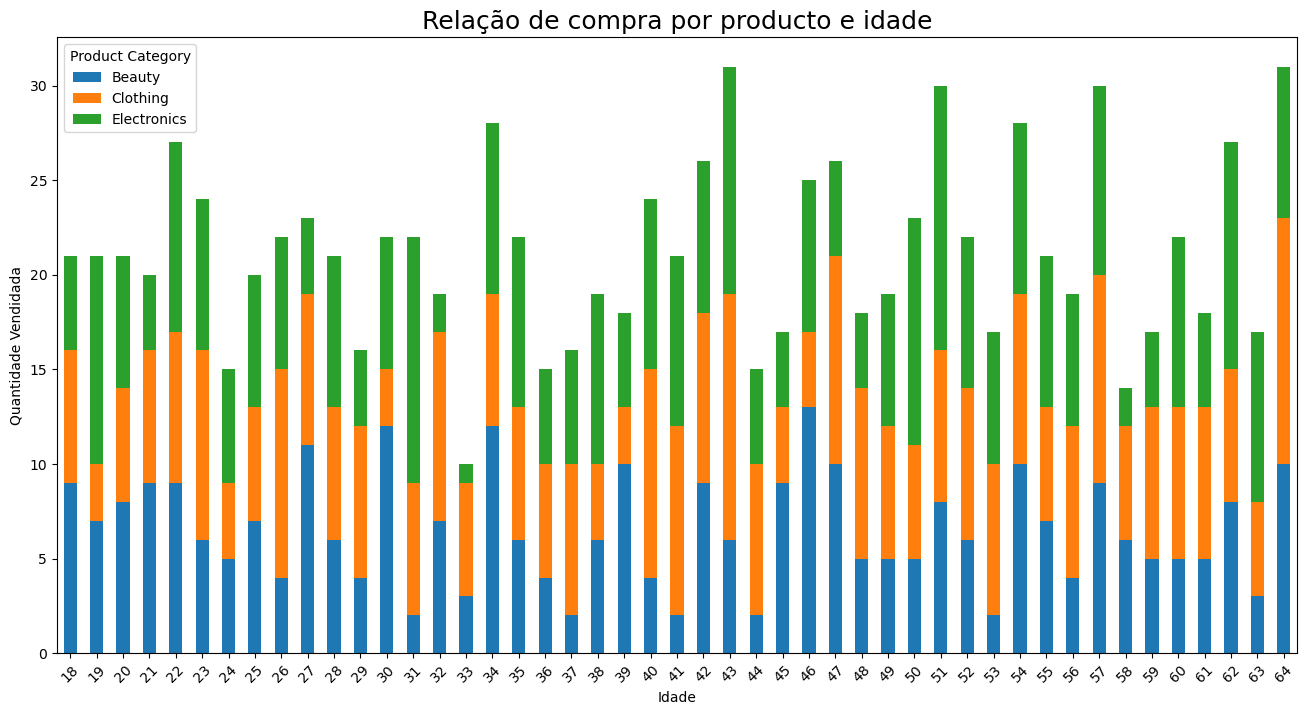

In [25]:
# vamos plotar um grafico mostrando a relação venda e idade dos clientes, com base no tipo de productos comprados
age_prod_gouped.plot(kind='bar', stacked=True, figsize=(16,8))
plt.title('Relação de compra por producto e idade', fontsize=18)
plt.xlabel('Idade')
plt.xticks(rotation=45)
plt.ylabel('Quantidade Vendidada')
plt.show()

Podemos ver que há muita variação de idades que compram productos de beleza (cosmeticos), vamos repartir esse grafico só para productos de beleza, e ver a variação de compra pelas idades de ambos os sexos.

In [26]:
age_gender_prod_gouped = retail_sales[retail_sales['Product Category'].isin(['Beauty'])]\
.groupby(by=['Age','Gender'])['Transaction ID'].count().unstack().fillna(0)
age_gender_prod_gouped

Gender,Female,Male
Age,,
18,5.0,4.0
19,4.0,3.0
20,5.0,3.0
21,5.0,4.0
22,5.0,4.0
23,3.0,3.0
24,2.0,3.0
25,3.0,4.0
26,4.0,0.0


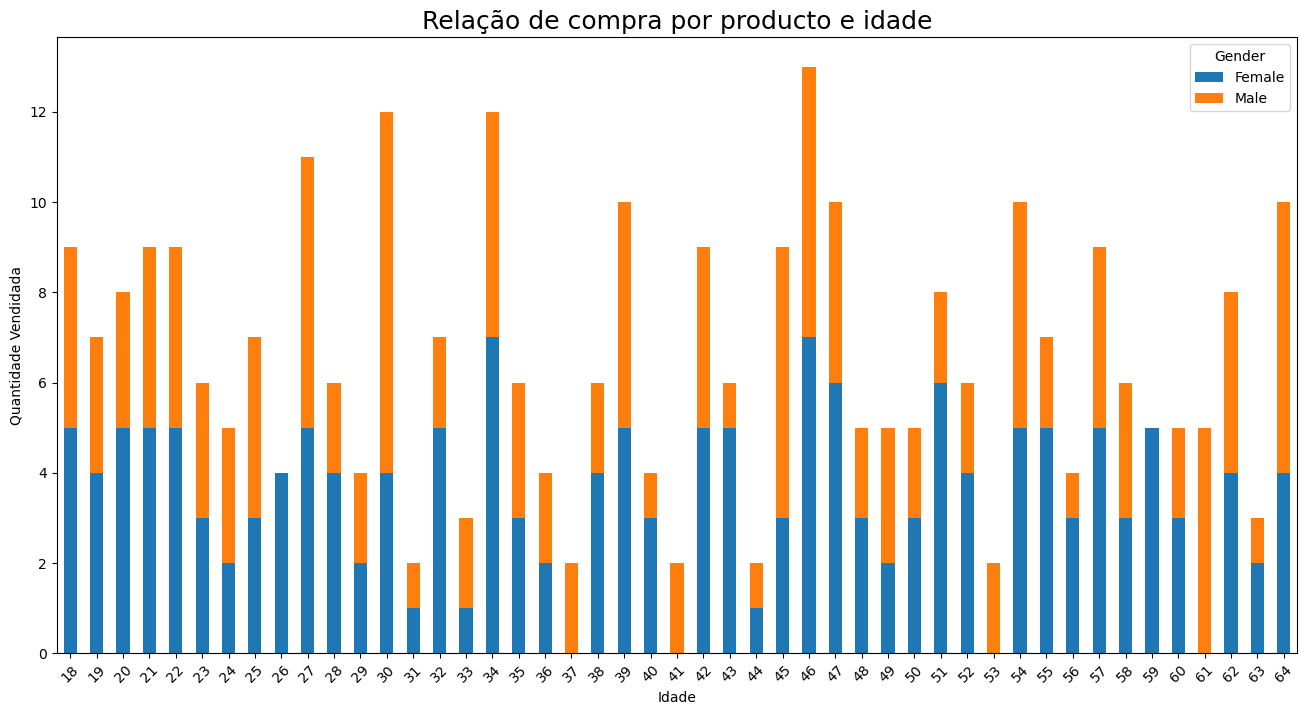

In [27]:
age_gender_prod_gouped.plot(kind='bar', stacked=True, figsize=(16,8))
plt.title('Relação de compra por producto e idade', fontsize=18)
plt.xlabel('Idade')
plt.xticks(rotation=45)
plt.ylabel('Quantidade Vendidada')
plt.show()

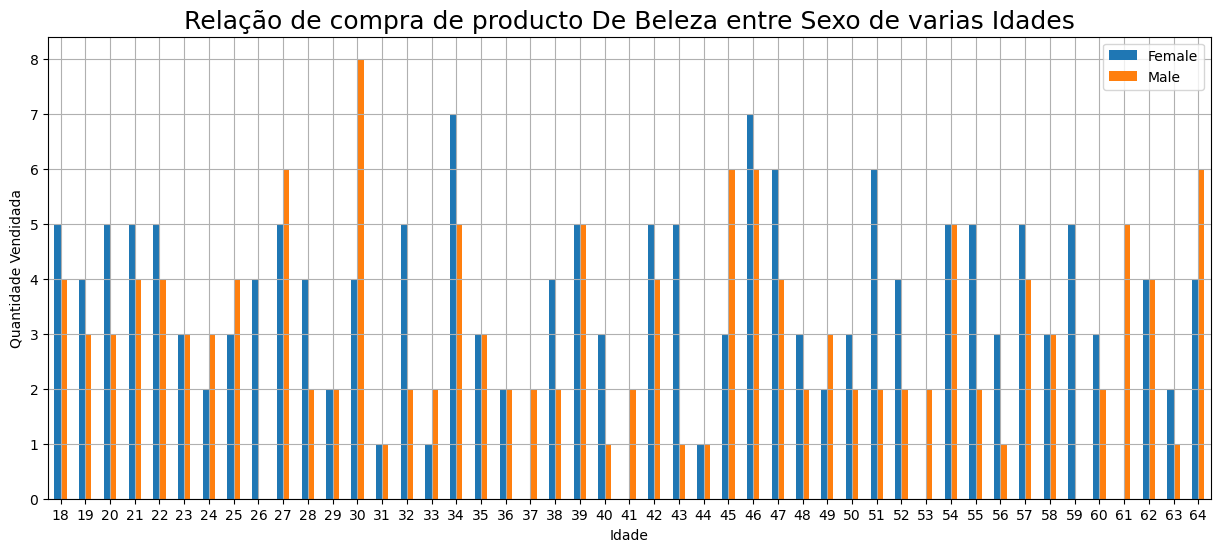

In [28]:
fig, ax = plt.subplots(figsize=(15,6))
age_gender_prod_gouped.plot(kind='bar',ax=ax)
#age_gender_prod_gouped.plot(kind='barh', y='Female', ax=ax)

plt.legend()
plt.title('Relação de compra de producto De Beleza entre Sexo de varias Idades', fontsize=18)
plt.xlabel('Idade')
plt.xticks(rotation=0)
plt.ylabel('Quantidade Vendidada')
plt.grid(True)
plt.show()

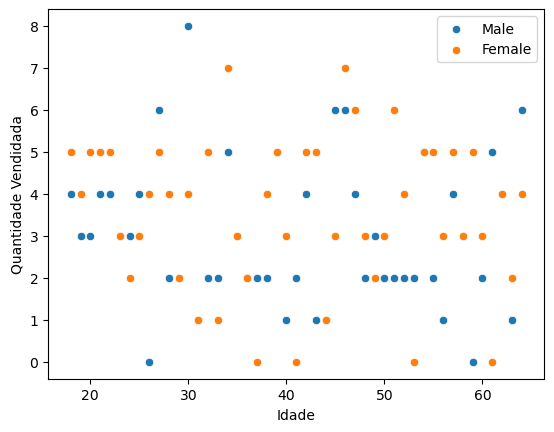

In [29]:
fig, ax = plt.subplots()
sns.scatterplot(data=age_gender_prod_gouped.reset_index(), x='Age', y='Male', ax=ax, label='Male')
sns.scatterplot(data=age_gender_prod_gouped.reset_index(), x='Age', y='Female', ax=ax, label='Female')
plt.xlabel('Idade')
plt.ylabel('Quantidade Vendidada')
plt.legend()

plt.show()

Em suma podemos afimar que tanto homens quanto mulheres compram productos de beleza, em especial os homens na idade de 30, são os que mais compram productos de beleza, já para as mulheres há uma grande variação nas clientes que compram producto de beleza.

## 1. Como a idade e o sexo do cliente influenciam seu comportamento de compra?

O Objectivo aqui é analisar como a idade do cliente pode influênciar ser comportamento de compra!

In [30]:
# Segmentação por idade e sexo
age_gender__grouped = retail_sales.groupby(by=['Age','Gender']).agg({
    'Total Amount': 'sum',# Total gasto
    'Transaction ID': 'count',# Número de transações
    'Product Category': lambda x: x.nunique() # Número de categorias únicas compradas
    }
).reset_index()

age_gender__grouped.columns = ['Age', 'Gender', 'Total Amount', 'Number of Transactions', 'Unique Categories']

age_gender__grouped

,Age,Gender,Total Amount,Number of Transactions,Unique Categories
0,18,Female,7940,13,3
1,18,Male,3275,8,2
2,19,Female,7335,11,3
3,19,Male,7535,10,3
4,20,Female,5175,12,3
...,...,...,...,...,...
89,62,Male,5060,16,3
90,63,Female,1205,6,3
91,63,Male,8045,11,3
92,64,Female,6325,19,3


Vamos vizualizar os dados

In [31]:
age_gender__grouped.pivot_table(index='Age', columns='Gender', values='Total Amount', aggfunc='sum').mean()

Gender
Female    4954.042553
Male      4748.085106
dtype: float64

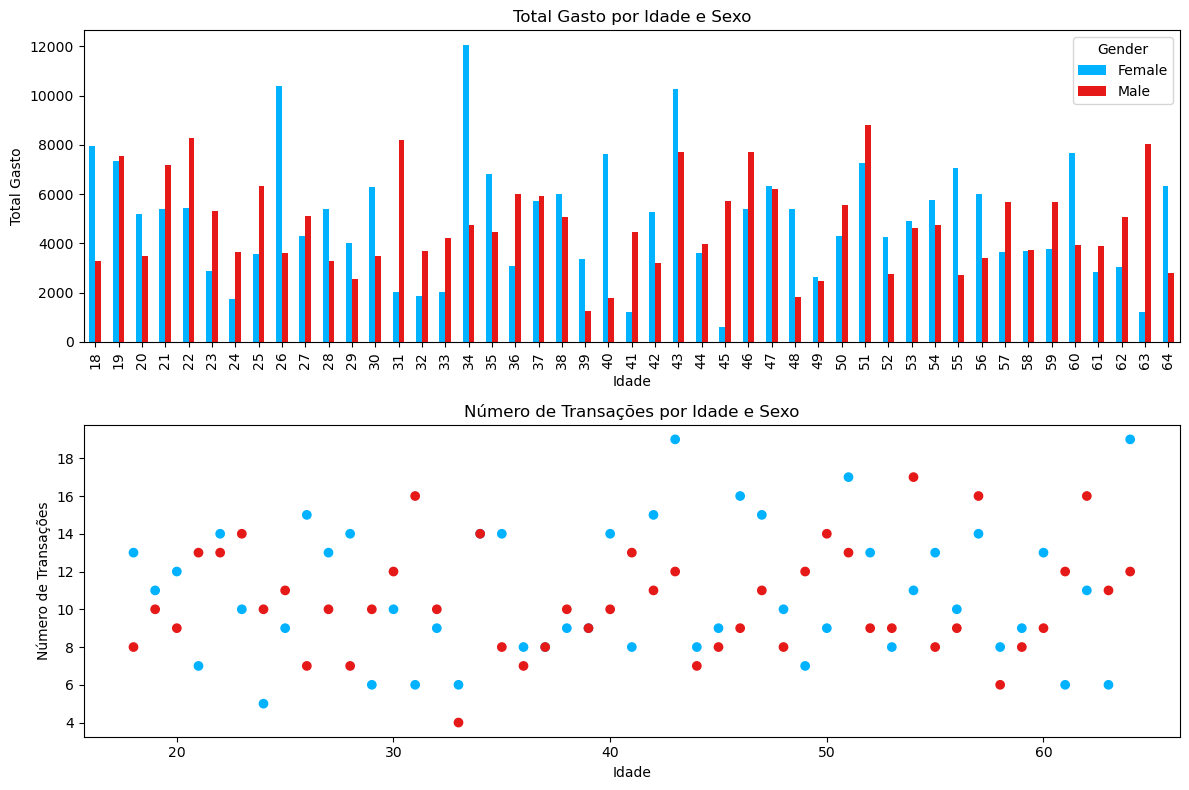

In [32]:
# Visualização de compras por idade e sexo
fig, ax = plt.subplots(2,1,figsize=(12, 8))

# Gráfico de barras para o total gasto
age_gender__grouped.pivot_table(index='Age', columns='Gender', values='Total Amount', aggfunc='sum').plot(kind='bar', ax=ax[0],
    color=age_gender__grouped['Gender'].map({'Male': '#e61919', 'Female': '#00b2ff'})
)
#ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 0)
ax[0].set_title('Total Gasto por Idade e Sexo')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Total Gasto')

# Gráfico de dispersão para o número de transações
ax[1].scatter(age_gender__grouped['Age'], age_gender__grouped['Number of Transactions'], c=age_gender__grouped['Gender'].map({'Male': '#e61919', 'Female': '#00b2ff'}))
ax[1].set_title('Número de Transações por Idade e Sexo')
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Número de Transações')


plt.tight_layout()
plt.show()

Com base na idade e no sexo. Esta análise nos forneceu insights valiosos que podem orientar nossas estratégias de marketing, segmentação de clientes e desenvolvimento de produtos. Abaixo estão os principais resultados:

- Observamos que, em geral, as clientes do sexo feminino tendem a gastar mais do que os clientes do sexo masculino na maioria das faixas etárias. Sendo os clientes de Sexo Masculino os que mais fazem transações por idade.

- No entanto, há uma variação significativa nos padrões de gastos entre diferentes faixas etárias. Por exemplo, os clientes do sexo masculino na faixa etária dos 22, 31 e 51 anos apresentam o maior gasto médio, enquanto as clientes do sexo feminino lideram em sua maioria termos de gasto.

- Notamos que as clientes do sexo feminino tendem a realizar mais transações do que os clientes do sexo masculino em todas as faixas etárias.

Além disso, observamos um pico no número de transações entre os clientes do sexo feminino na faixa etária dos 25-35 anos, sugerindo uma oportunidade de segmentação mais direcionada para esse grupo demográfico.

Esses resultados nos permitem entender melhor o comportamento de compra de nossos clientes e adaptar nossas estratégias de marketing e produto de acordo.



## 2. Existem padrões discerníveis nas vendas em diferentes períodos de tempo?

Vamos analisar se existem padrões de compras ao longo do tempo.

In [34]:
retail_sales.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [35]:
# Aqui vamos Agrupar as vendas por mês. 
montlhy_sales = retail_sales.resample('M', on='Date')['Total Amount'].sum()
montlhy_sales

Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: M, Name: Total Amount, dtype: int64

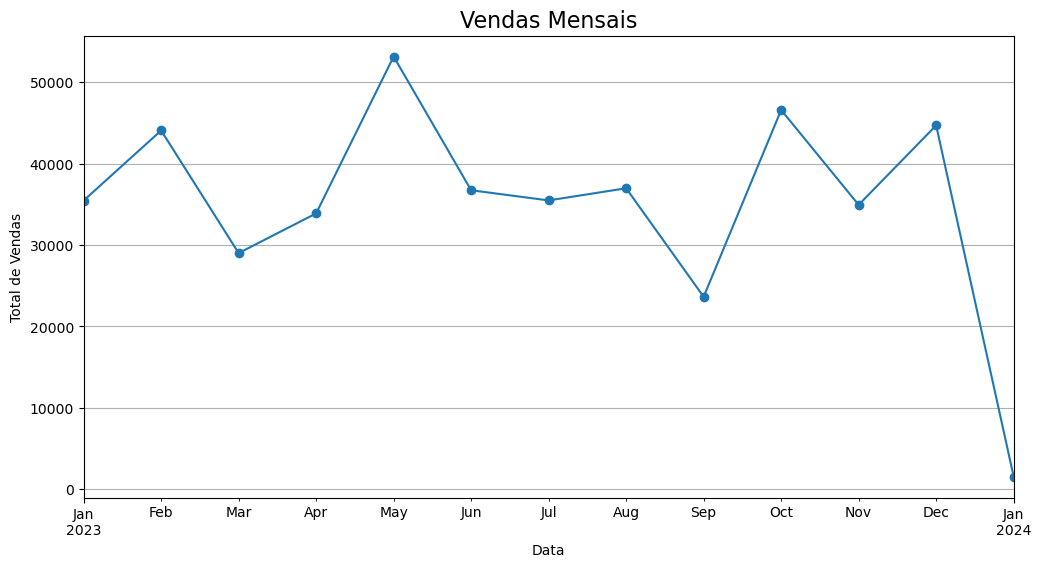

In [37]:
# para vermos se há diferença nas vendas em periodo de tempo, vamos plotar o grafico

# criando uma figure para caber o grafico 12,6
plt.figure(figsize=(12,6))
# plotando o grafico de linhas
montlhy_sales.plot(marker='o')
# Outros elementos do grafico
plt.title('Vendas Mensais', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()

Podemos observar que as compras dos clientes têm variado bastante ao longo dos meses, com ligeiros picos de vendas em **Fevereiro, Maio, Outubro e Dezembro**, que são meses onde há feriados grandes como Dia dos namorados (*Fevereiro*), Halloween (*Outubro*), e o natal em *Dezembro*, o que explica a queda de compra nos meses seguintes.

Vamos observar melhor esse comportamento, tentando observar a venda para cada producto, mensal.

In [39]:
# Agrupar as vendas por produto e por mês
product_monthly_sales = retail_sales.groupby(['Product Category', pd.Grouper(key='Date', freq='M')])['Total Amount'].sum().unstack(level=0)

# exibindo dos dados
product_monthly_sales

Product Category,Beauty,Clothing,Electronics
Date,,,
2023-01-31,12430.0,13125.0,9895.0
2023-02-28,14035.0,14560.0,15465.0
2023-03-31,10545.0,15065.0,3380.0
2023-04-30,11905.0,13940.0,8025.0
2023-05-31,12450.0,17455.0,23245.0
2023-06-30,10995.0,10170.0,15550.0
2023-07-31,16090.0,8250.0,11125.0
2023-08-31,9790.0,12455.0,14715.0
2023-09-30,6320.0,9975.0,7325.0


Podemos observar que agrupamos os dados por mês, a por cada tipo de producto, e podemos notar que temos valor nulo, na venda de productos de vestimentas em Janeiro de 2024 (Ano seguinte), o que é interessante observar esse comportamente Podemos conluir que não foram colectados dados suficientes para fazermos uma previsão de vendas em Janeiro de 2024..

Precisamos limpar esse valor nulo, ou deixar assim já que vamos simplesmente plotar o grafico.

Uma excelente ideia, seria analisar o as vendas semanalmente, ou quinzenalmente, para ver os padrões de compras em certas semanas dos meses, para melhor usar para campanhas de marketing direcionados aos clientes.

<Figure size 1200x600 with 0 Axes>

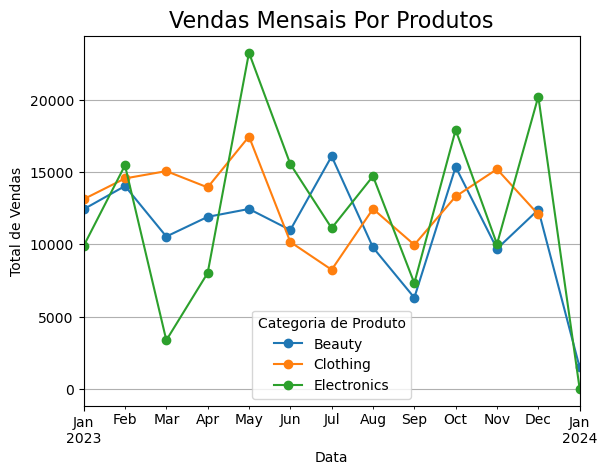

In [40]:
# criando uma figure para caber o grafico 12,6
plt.figure(figsize=(12,6))
# plotando o grafico de linhas
product_monthly_sales.plot(marker='o')
# Outros elementos do grafico
plt.title('Vendas Mensais Por Produtos', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.legend(title='Categoria de Produto')
plt.grid(True)
plt.show()

É Perceptivel observar que Mêses como **Fevereiro, Maio, Outubro e Dezembro** são meses que as vendas de productos _Eletronicos_ são mais comprados por clientes, **Vestuarios e Cosmeticos**, chegam a ser compradas bastante nos meses de Fevereiro e Outubro, que faz sentido, sendo que em Fevereiro, são meses que se compram bastante presentes, especialmente para o dia dos namorados, presentes como roupa, cosmeticos como (Perfumes, maquiagens etc.) são bem atrativos, o mesmo para epocas com o Halloween (dia das bruxas).

Nota-se que no Inicio do Verão (Julho para os países na qual o dado é proveniente) a venda de **Cosmeticos** é bem maior em relação a outros tipos de productos, o que faz sentido. 

---- 
Vamos ver neste periodo de tempo, quanto aos Géneros, quais productos eles mais compram, em quais quantidades.

In [41]:
product_monthly_sales_by_Gender = retail_sales.groupby(
    by=['Product Category', 'Gender', pd.Grouper(key='Date', freq='M')]
)['Quantity'].sum().unstack(level=[0, 1])

product_monthly_sales_by_Gender

Product Category Beauty       Clothing       Electronics      
Gender           Female  Male   Female  Male      Female  Male
Date                                                          
2023-01-31         39.0  20.0     29.0  43.0        34.0  30.0
2023-02-28         29.0  39.0     23.0  52.0        33.0  38.0
2023-03-31         38.0  13.0     54.0  57.0        21.0  11.0
2023-04-30         45.0  24.0     56.0  37.0        20.0  32.0
2023-05-31         40.0  25.0     38.0  59.0        37.0  60.0
2023-06-30         30.0  36.0     34.0  33.0        35.0  29.0
2023-07-31         37.0  33.0     30.0  15.0        27.0  34.0
2023-08-31         31.0  31.0     42.0  36.0        61.0  26.0
2023-09-30         22.0  28.0     37.0  23.0        37.0  23.0
2023-10-31         32.0  51.0     32.0  42.0        49.0  46.0
2023-11-30         36.0  27.0     36.0  33.0        24.0  49.0
2023-12-31         39.0  23.0     30.0  23.0        61.0  31.0
2024-01-31          NaN   3.0      NaN   NaN         NaN   1.0

Podemos Claramente ver que só houve uma compra de producto em Janeiro de 2024, e foi de apenas um producto eletronico e três productos de beleza comprado por homens, e foi comprado por um cliente homem.


In [43]:
product_monthly_sales_by_Gender.reset_index()

Product Category       Date Beauty       Clothing       Electronics      
Gender                      Female  Male   Female  Male      Female  Male
0                2023-01-31   39.0  20.0     29.0  43.0        34.0  30.0
1                2023-02-28   29.0  39.0     23.0  52.0        33.0  38.0
2                2023-03-31   38.0  13.0     54.0  57.0        21.0  11.0
3                2023-04-30   45.0  24.0     56.0  37.0        20.0  32.0
4                2023-05-31   40.0  25.0     38.0  59.0        37.0  60.0
5                2023-06-30   30.0  36.0     34.0  33.0        35.0  29.0
6                2023-07-31   37.0  33.0     30.0  15.0        27.0  34.0
7                2023-08-31   31.0  31.0     42.0  36.0        61.0  26.0
8                2023-09-30   22.0  28.0     37.0  23.0        37.0  23.0
9                2023-10-31   32.0  51.0     32.0  42.0        49.0  46.0
10               2023-11-30   36.0  27.0     36.0  33.0        24.0  49.0
11               2023-12-31   39.0  23.0     30.0  23.0        61.0  31.0
12               2024-01-31    NaN   3.0      NaN   NaN         NaN   1.0

<Figure size 1200x800 with 0 Axes>

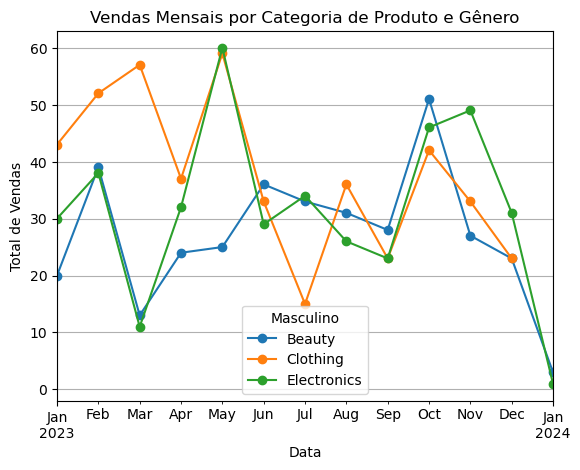

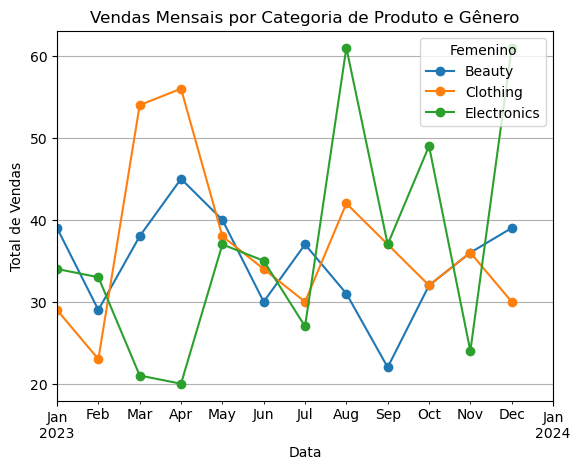

In [50]:
plt.figure(figsize=(12, 8))
for gender in ['Male', 'Female']:
    product_monthly_sales_by_Gender.xs(gender, level='Gender', axis=1).plot(marker='o', label=gender)
    plt.title('Vendas Mensais por Categoria de Produto e Gênero')
    if gender == 'Male':
        plt.legend(title='Masculino')
    else:
        plt.legend(title='Femenino')
    plt.grid(True)
    plt.ylabel('Total de Vendas')
    plt.xlabel('Data')

plt.show()

É notavel que o tipo de producto mais comprado são productos eletronicos, com uma forte distinção a compra de produtos de vestuarios por parte dos homens, especialmente nos mêses de Fevereiro e Março. 

Podemos mais uma vez notar que o maiores compradores,são clientes do sexo masculino, liderando na maior parte dos mesês compras de productos em grandes quantidades.

----
## 3. Quais categorias de produtos têm maior apelo entre os clientes?

Acima, já fizemos algo similar, na qual deu para entender que o producto que vais é vendido é o producto de vestimentas, o que representa 35,1% dos dados de venda que temos.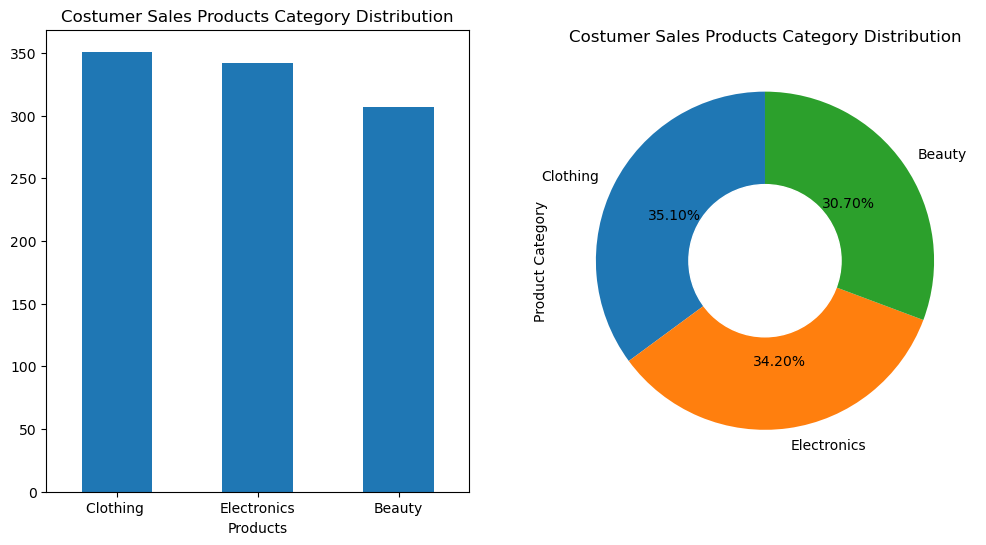 mas isso não implica que seja o tipo de producto de mais dá dinheiro, sendo que os productos possuem preços unitarios diferentes, e são comprados em quantidades diferentes. 

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


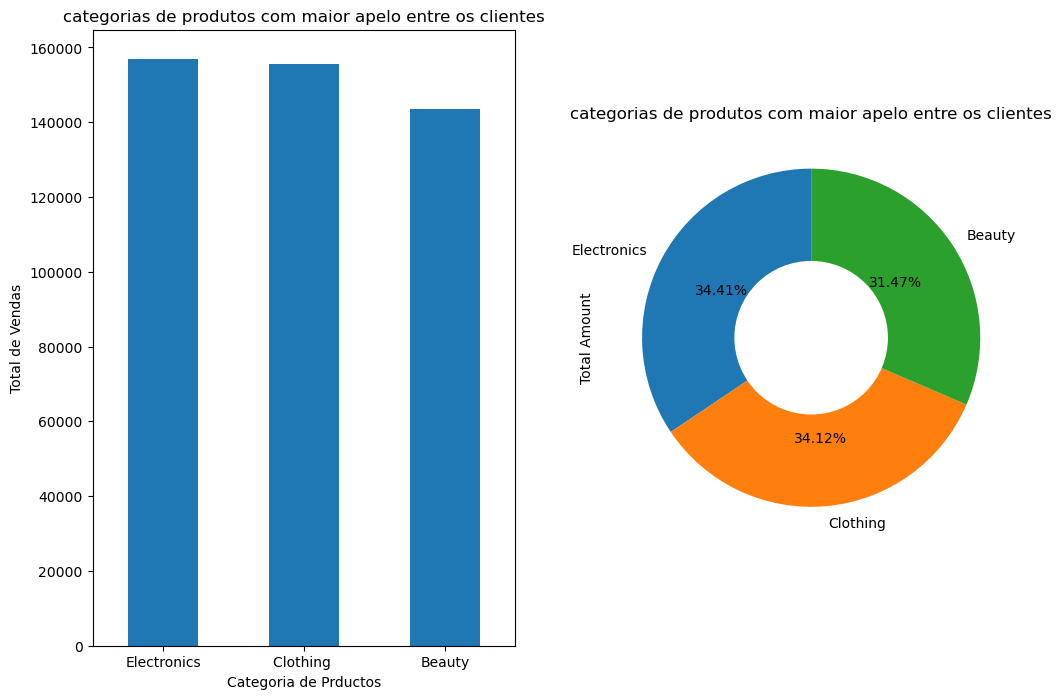

In [55]:
prod_sales = retail_sales.groupby(['Product Category'])['Total Amount'].sum().sort_values(ascending=False)
print(prod_sales)

# Vamos Exibir as categorias de produtos com maior apelo entre os clientes

fig, axes = plt.subplots(1,2,figsize=(12,8))
prod_sales.plot(title='categorias de produtos com maior apelo entre os clientes', ax=axes[0], kind='bar')
axes[0].set_xticklabels(['Electronics','Clothing ','Beauty'],rotation=0)
axes[0].set_xlabel('Categoria de Prductos')
axes[0].set_ylabel('Total de Vendas')

prod_sales.plot(
    title='categorias de produtos com maior apelo entre os clientes', ax=axes[1], kind='pie', autopct='%.2f%%', startangle=90
    )

centro = plt.Circle((0,0), 0.45, color='white')
axes[1].add_artist(centro)

plt.show()

Com base nas vendas totais, o produto que mais vende são productos eletronicos, seguido de productos de vestuario, que representam 68,53% das vendas.

---

## 4. Quais são as relações entre idade, gastos e preferências de produto?

In [58]:
df = retail_sales.copy() # Copiando o nosso conjunto de dados em um novo

# Criando um intervalo de idades

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 40, 50, float('inf')], labels=['<18', '18-30', '31-40', '41-50', '50+'])

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,AgeGroup
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,31-40
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,18-30
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,41-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,31-40
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,18-30


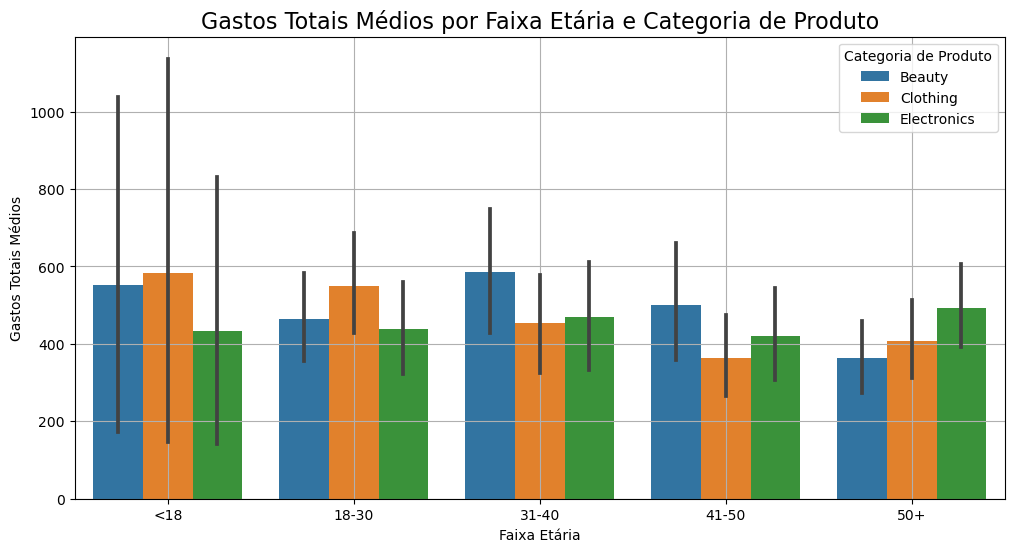

In [61]:
# Plotar gráficos de barras para comparar os gastos totais médios em diferentes categorias de produtos para diferentes faixas etárias
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='AgeGroup', y='Total Amount', hue='Product Category')
plt.title('Gastos Totais Médios por Faixa Etária e Categoria de Produto', fontsize=16)
plt.xlabel('Faixa Etária')
plt.ylabel('Gastos Totais Médios')
plt.legend(title='Categoria de Produto')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

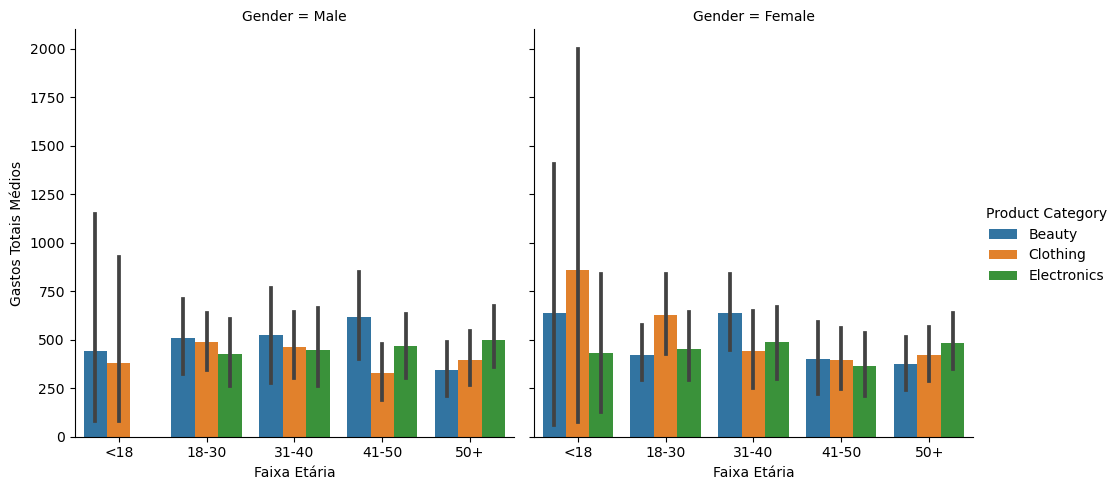

In [70]:
plt.figure(figsize=(12, 8))
g = sns.catplot(data=df, x='AgeGroup', y='Total Amount', hue='Product Category', kind='bar', col='Gender')
g.set_xlabels('Faixa Etária')
g.set_ylabels('Gastos Totais Médios')
#g.legend()
#plt.legend(title='Categoria de Produto')
#
#plt.grid(True)
#plt.title('Gastos Totais Médios por Faixa Etária e Categoria de Produto', fontsize=16)
plt.show()

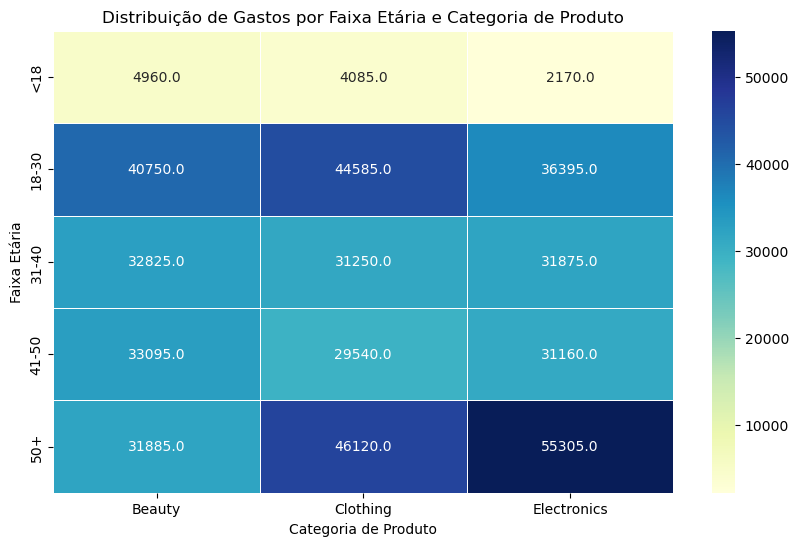

In [71]:
# Criar um mapa de calor para visualizar a distribuição de gastos em diferentes categorias de produtos para diferentes faixas etárias
heatmap_data = df.pivot_table(index='AgeGroup', columns='Product Category', values='Total Amount', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Distribuição de Gastos por Faixa Etária e Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Faixa Etária')
plt.show()

Podemos observar que relação entre productos e idade é bem notavel, nos de idade superior a 50 preferem productos eletronicos, as demais intervalos de idade gastam mais com vestimentas do que productos de beleza e electronicos.

---

## 5. Como os clientes adaptam seus hábitos de compra durante as tendências sazonais?

<Figure size 1200x800 with 0 Axes>

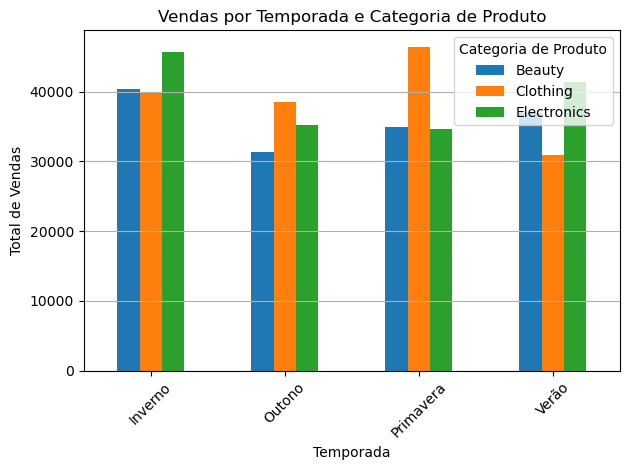

In [78]:
# Mapear cada mês para uma estação
season_map = {1: 'Inverno', 2: 'Inverno', 3: 'Primavera', 4: 'Primavera', 5: 'Primavera',6: 'Verão', 7: 'Verão', 8: 'Verão', 9: 'Outono', 10: 'Outono', 11: 'Outono', 12: 'Inverno'}
retail_sales['Season'] = retail_sales['Date'].dt.month.map(season_map)

# Filtrar as categorias de produtos de interesse
categorias_interesse = retail_sales['Product Category'].unique().tolist()
df_interesse = retail_sales[retail_sales['Product Category'].isin(categorias_interesse)]

# Agrupar as vendas por temporada e categoria de produto
sales_by_season_category = df_interesse.groupby(['Season', 'Product Category'])['Total Amount'].sum().unstack(level=1)

# Criar um gráfico de barras para visualizar as vendas por temporada e categoria de produto
plt.figure(figsize=(12, 8))
sales_by_season_category.plot(kind='bar')
plt.title('Vendas por Temporada e Categoria de Produto')
plt.xlabel('Temporada')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.legend(title='Categoria de Produto')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

As roupas são frequentemente mais vendidas na primavera devido a vários fatores:

- **Mudança de Estação**: A transição do inverno para a primavera motiva as pessoas a renovarem seus guarda-roupas com peças mais leves e coloridas².
- **Tendências da Moda**: As tendências de moda da primavera influenciam as compras, pois muitos desejam se sentir incluídos e atualizados com os estilos da estação³.
- **Conforto e Versatilidade**: As roupas de primavera são projetadas para se adaptar às variações de temperatura, sendo confortáveis e versáteis para o clima mais quente durante o dia e mais fresco à noite⁵.

Esses fatores contribuem para um aumento nas vendas de roupas durante a primavera.


## 6. Existem comportamentos de compra distintos com base no número de itens adquiridos por transação?

<Figure size 1200x800 with 0 Axes>

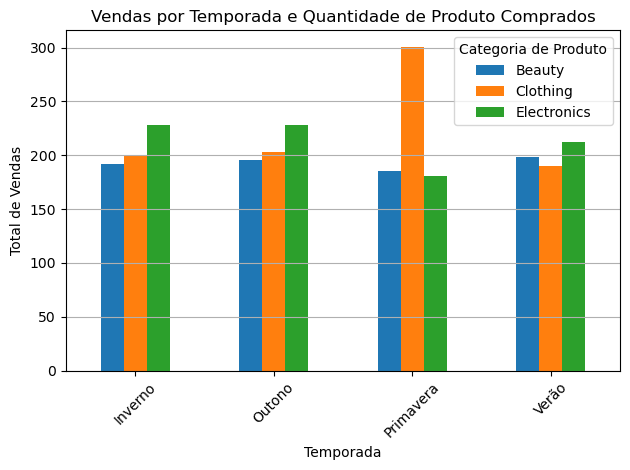

In [81]:
qtt_sales_by_season_category = df_interesse.groupby(['Season', 'Product Category'])['Quantity'].sum().unstack(level=1)

# Criar um gráfico de barras para visualizar as vendas por temporada e categoria de produto
plt.figure(figsize=(12, 8))
qtt_sales_by_season_category.plot(kind='bar')
plt.title('Vendas por Temporada e Quantidade de Produto Comprados')
plt.xlabel('Temporada')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.legend(title='Categoria de Produto')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

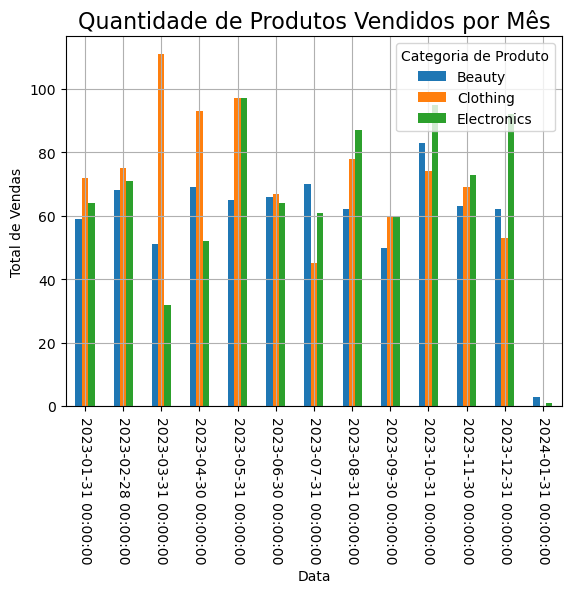

In [86]:
# Agrupar as vendas por produto e por mês
product_monthly_qtt_sales = retail_sales.groupby(['Product Category', pd.Grouper(key='Date', freq='M')])['Quantity'].sum().unstack(level=0)

# criando uma figure para caber o grafico 12,6
plt.figure(figsize=(12,6))
# plotando o grafico de linhas
product_monthly_qtt_sales.plot(kind='bar')
# Outros elementos do grafico
plt.title('Quantidade de Produtos Vendidos por Mês', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.legend(title='Categoria de Produto')
plt.xticks(rotation=270)
plt.grid(True)
plt.show()